In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize, ZScaleInterval

In [20]:
df_ZTF = pd.read_pickle("dataset_ZTF.pkl")
print(df_ZTF['class'].value_counts())
print(df_ZTF['oid'].unique())

KeyboardInterrupt: 

In [18]:
df_ZTF_2 = df_ZTF.drop_duplicates(subset = 'oid').set_index('oid', drop=True)

print(df_ZTF_2['class'].value_counts())
print(df_ZTF_2.index.unique().shape)

bogus        15970
vs           10485
agn           9971
asteroid      9275
sn            3654
satellite      580
Name: class, dtype: int64
(49935,)


In [19]:
df_ZTF.shape

(50925, 8)

In [23]:
df_multires = pd.read_pickle('multires_image_paths.pkl')
df_multires =df_multires.drop_duplicates(subset='oid').set_index('oid', drop=True)
print(df_multires.index.unique())


Index(['ZTF18abtnlik', 'ZTF20aanvpzo', 'ZTF20aawxpru', 'ZTF19abzmpvb',
       'ZTF20abnvdem', 'ZTF18abfwuwn', 'ZTF20aapycrh', 'ZTF19aanxnkd',
       'ZTF19aanxosu', 'ZTF18abmrhom',
       ...
       'ZTF19aatxtrn', 'ZTF19aatxvag', 'ZTF19aatxvho', 'ZTF19aatxvkg',
       'ZTF19aatxvni', 'ZTF19aatxvov', 'ZTF19aatxxrk', 'ZTF19aatyilm',
       'ZTF19aatyipq', 'ZTF19aatyjjt'],
      dtype='object', name='oid', length=32888)


In [29]:
len(set(df_ZTF_2.index) & set(df_multires.index))


32888

In [31]:
df_ZTF_2.loc[df_multires.index]["class"].value_counts()

bogus       13425
agn          6449
asteroid     5128
vs           5057
sn           2829
Name: class, dtype: int64

In [16]:



# Esta función permite graficar las imágenes ciencia, referencia y diferencia del ejemplo deseado
# Los parametros de entrada se presentan a continuación
# df: dataset del cual se quiere extraer la información
# clase: la clase de la cual se quiere ver el ejemplo
# number: el número de ejemplo a gráficar

def graf_sci_ref_dif(df, clase, number):

    filtro_agn = df[df['class'] == clase]
    fila = filtro_agn.iloc[number]

    # Extraer datos
    science = np.array(fila['science'])
    reference = np.array(fila['reference'])
    diff = np.array(fila['diff'])
    oid = fila['oid']
    clase = fila['class']

    # Crear normalización con ZScale (ajuste automático de contraste)
    norm = ImageNormalize(interval=ZScaleInterval())

    # Crear la figura y los ejes
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

    # Nombres de las imágenes
    titulos = ["Science", "Reference", "Difference"]

    # Graficar cada imagen
    for ax, img, title in zip(axes, [science, reference, diff], titulos):
        im = ax.imshow(img, cmap='inferno', origin='lower', norm=norm)
        ax.set_title(title, fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])

    # Agregar barra de color fuera de la imagen
    cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # [pos_x, pos_y, ancho, alto]
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label("Intensidad", fontsize=12)

    # Agregar título general con OID y clase
    plt.suptitle(f"OID: {oid} | Clase: {clase}", fontsize=16, fontweight='bold')

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajuste para no solapar el título
    return plt.show()




C:\Users\Arkaz\AppData\Local\Temp\ipykernel_12072\178923059.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajuste para no solapar el título


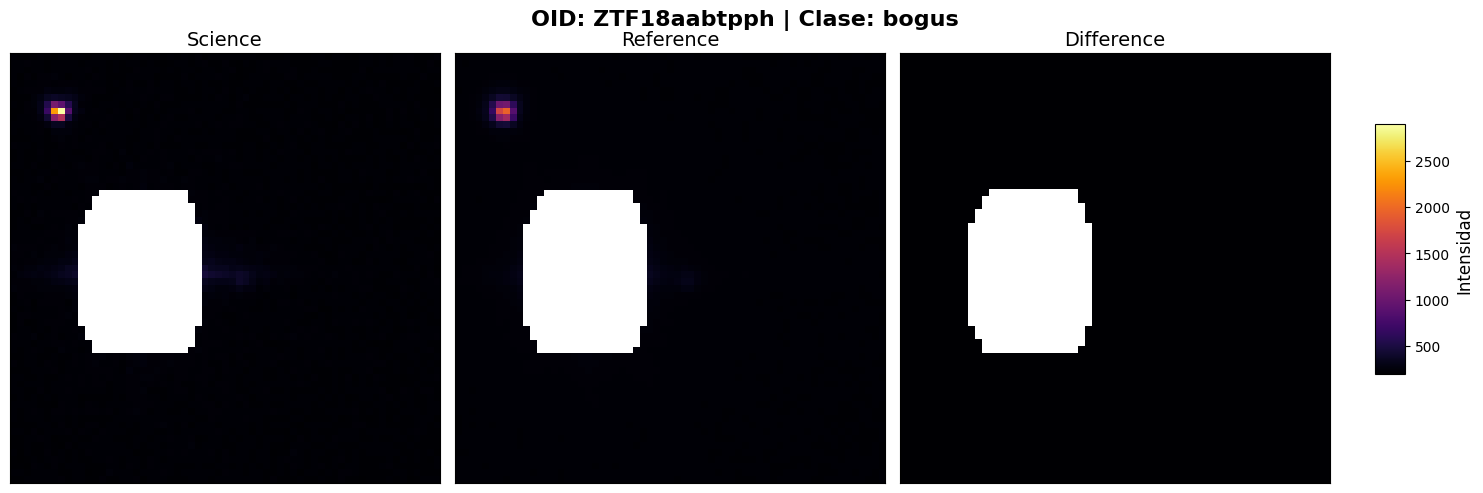

None


In [23]:
print(graf_sci_ref_dif(df_ZTF_2, 'bogus', 25))

C:\Users\Arkaz\AppData\Local\Temp\ipykernel_12072\178923059.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajuste para no solapar el título


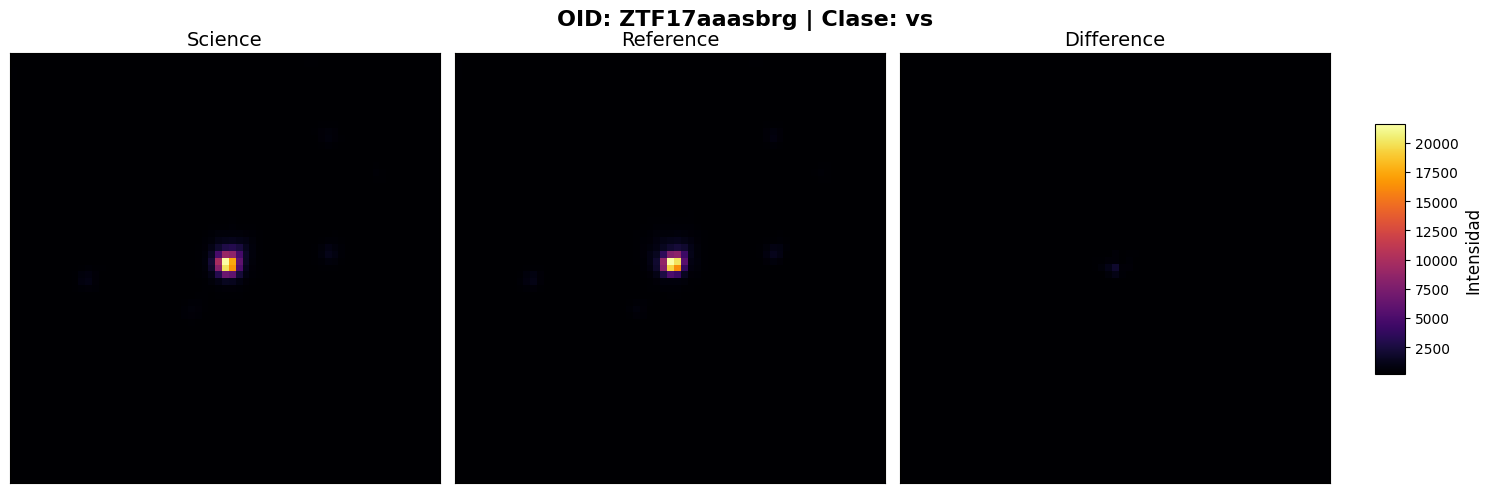

None


In [26]:
print(graf_sci_ref_dif(df_ZTF_2, 'vs', 35))

C:\Users\Arkaz\AppData\Local\Temp\ipykernel_12072\178923059.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajuste para no solapar el título


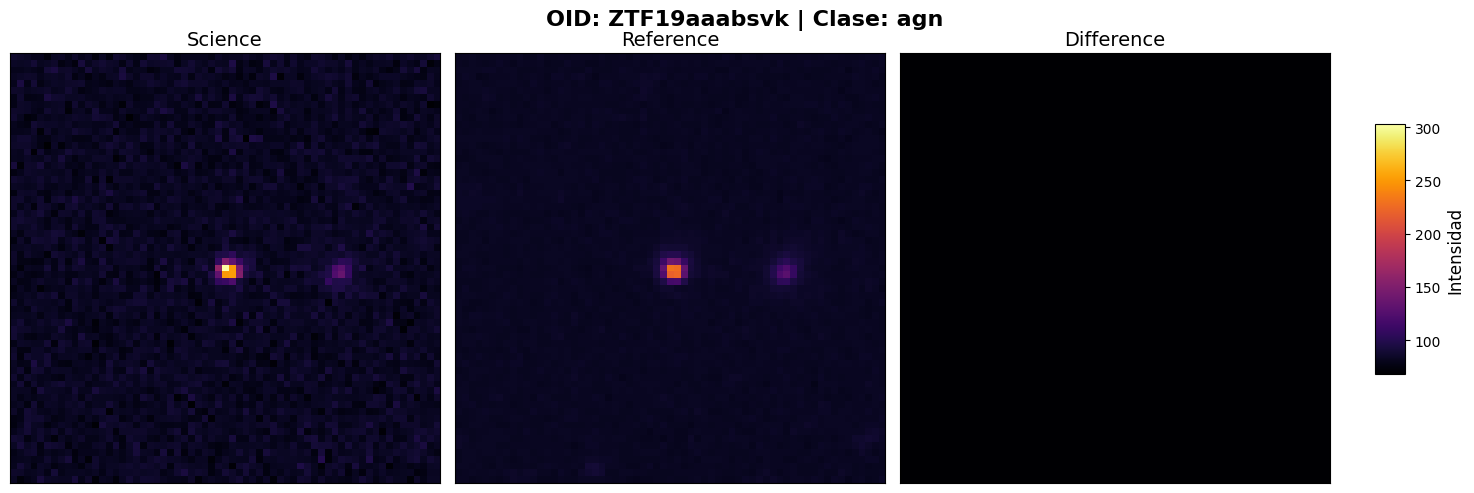

None


In [28]:
print(graf_sci_ref_dif(df_ZTF_2, 'agn', 50))

C:\Users\Arkaz\AppData\Local\Temp\ipykernel_12072\178923059.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajuste para no solapar el título


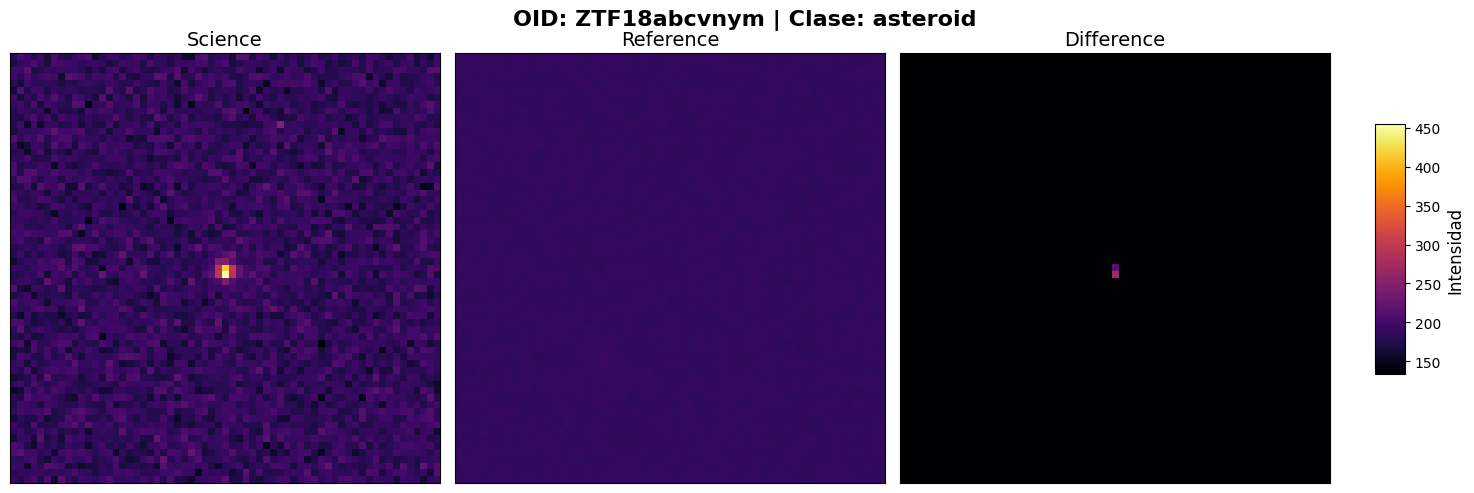

None


In [29]:
print(graf_sci_ref_dif(df_ZTF_2, 'asteroid', 50))

C:\Users\Arkaz\AppData\Local\Temp\ipykernel_12072\178923059.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajuste para no solapar el título


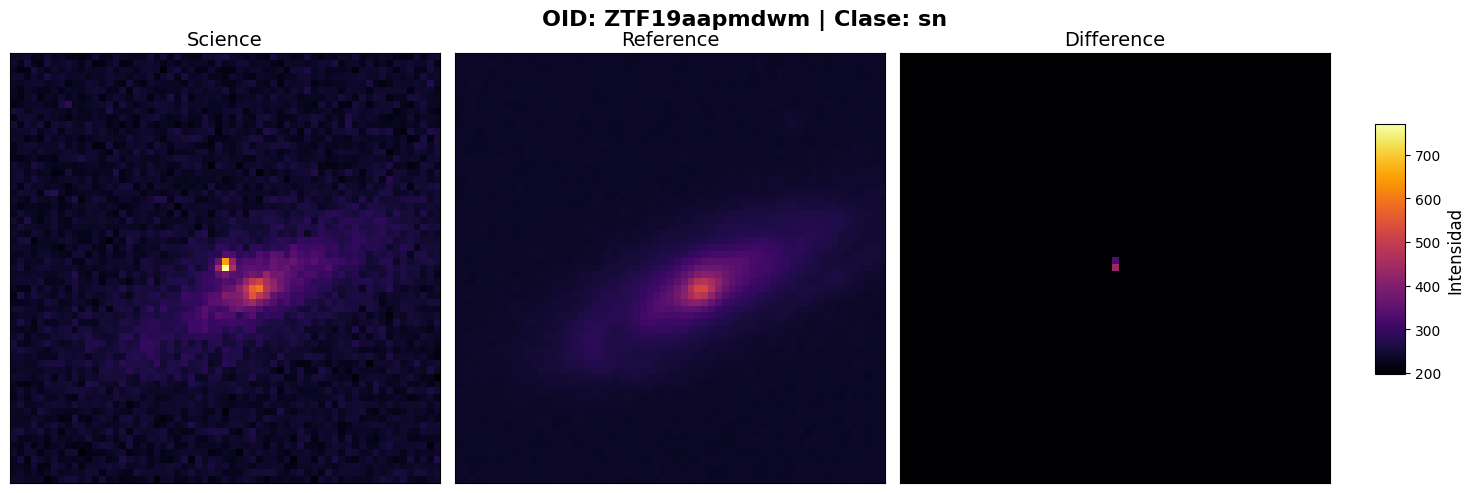

None


In [35]:
print(graf_sci_ref_dif(df_ZTF_2, 'sn', 27))